In [1]:
import pandas as pd
pd.__version__
# import os
# os.path.abspath(pd.__file__)

'0.22.0'

In [2]:
%matplotlib inline
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt
# Set plot font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 18
colors = ['#1f78b4', '#7d4d4c','#fcc2c1']
outdir = 'graphs/'
date_prefix='06142018'

In [3]:
sampling_types = ['bandit False', 'uniform True', 'uniform False']
sampling_type_names = ['MAB','Revise always', 'Revise if different']

In [4]:
combinedDfFile = '/Users/rafferty/banditalgorithms/matlabScripts/CombinedDfMatlabProcessedSwitchToBest.csv'
df = pd.read_csv(combinedDfFile)
mask = (df.loc[:,'overall_sampling_type'] == 'bandit False') & (df.loc[:,'reward_type'] == 'normal')
df.loc[(df.overall_sampling_type == 'bandit False') & (df.reward_type == 'normal'),:].sort_values('total_size')


,reward_type,before_switch_only,overall_sampling_type,GroupCount,mean_avg_reward_per_step,sem_avg_reward_per_step,mean_sample_size_1,sem_sample_size_1,mean_sample_size_2,sem_sample_size_2,mean_mean_1,sem_mean_1,mean_mean_2,sem_mean_2,mean_is_sig,sem_is_sig,total_size
15,normal,1,bandit False,500,0.366831,0.010322,111.060,0.710037,16.940,0.710037,0.491142,0.009299,-0.881824,0.031956,0.416,0.022065,1
3,normal,0,bandit False,500,0.416087,0.006530,236.856,0.839753,19.144,0.839753,0.488565,0.006641,-0.844392,0.026674,0.628,0.021637,2
9,normal,0,bandit False,500,0.467838,0.003439,743.450,0.855087,24.550,0.855087,0.500884,0.003314,-0.844153,0.026921,0.886,0.014227,6
21,normal,0,bandit False,500,0.482225,0.002447,1379.732,0.959994,28.268,0.959994,0.502421,0.002386,-0.737024,0.021023,0.958,0.008980,11


In [5]:
def plot_avg_reward_gain(df, reward_type, ax, series_name, ylabel="", hasLegend=True, legend_anchor=(0.55, 1.55), stdError=False):
    df = df.loc[df.reward_type == reward_type,:]
    
    width = 0.2         # the width of the bars
    ind = np.arange(4)-width    # the x locations for the groups

    for index,sampling_type in zip(range(len(sampling_types)),sampling_types):
        cur_series = df.loc[(df.overall_sampling_type == sampling_type),:].sort_values('total_size')
        p1 = ax.bar(ind + width*index, cur_series.loc[:,'mean_' + series_name], 
                    width, color = colors[index] , 
                    yerr=cur_series.loc[:,'sem_' + series_name])


#     womenMeans = (145*cm, 149*cm, 172*cm, 165*cm, 200*cm)
#     womenStd = (30*cm, 25*cm, 20*cm, 31*cm, 22*cm)
#     p2 = ax.bar(ind + width, womenMeans, width,
#                 color='y', bottom=0*cm, yerr=womenStd)

#     ax.set_title('Scores by group and gender')
#     ax.set_xticks(ind + width / 2)
#     ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

#     ax.legend((p1[0], p2[0]), ('Men', 'Women'))
#     ax.yaxis.set_units(inch)
#     ax.autoscale_view()
    

    
#     m = df[["Optimal Reward"]+list(mean_names_lst)]
#     std = df[list(std_names_lst)+['or_std']]
#     std.columns = list(mean_names_lst)+['Optimal Reward']
#     m.plot.bar(ax=ax, yerr=std, rot=0, color=colors)

    ax.set_xlabel('Number of students')
    ax.set_xticks(ind+width)
    xticks = ['m','2m','6m','11m']
#     xticks[1] = 'Moderate'
    ax.set_xticklabels(xticks)
    ax.set_ylabel(ylabel)

#     if hasLegend:
#         leg  = ax.legend(ncol=5, bbox_to_anchor=legend_anchor, fontsize=16)
#         leg.get_texts()[len(leg.get_texts()) - 1].set_text('Uniform assignment')
#     else:
#         ax.legend_.remove()

#     if reward_type == 'binary':
#         ax.set_title("Average Reward\n(Binary rewards)")
#     elif reward_type == 'normal':
#         ax.set_title("Average Reward\n(Norm.-dist. rewards)")
    return ax

graphs/06142018SwitchToBestGraph.pdf


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


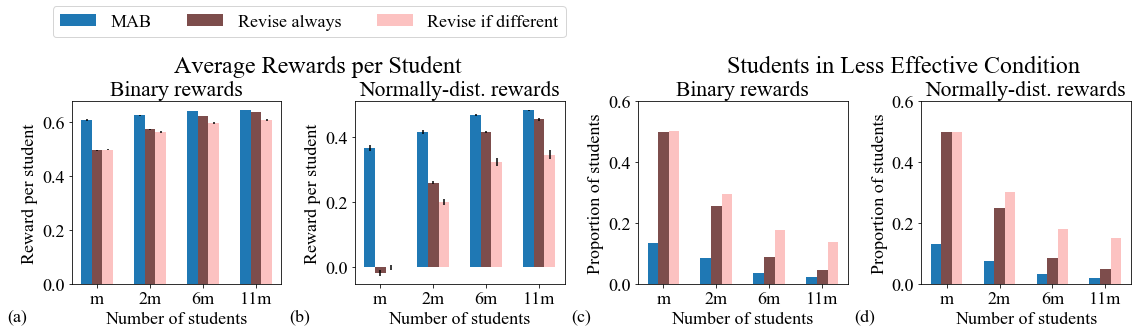

In [128]:
figure = plt.figure(figsize = (16, 4))
legend_height = 1.85
stdError = True
# Bar for Binary Reward 
combinedDfFile = '/Users/rafferty/banditalgorithms/matlabScripts/CombinedDfMatlabProcessedSwitchToBest.csv'
df = pd.read_csv(combinedDfFile)
df['mean_proportion_arm_2'] = df.mean_sample_size_2 / (df.mean_sample_size_2 + df.mean_sample_size_1)
df['sem_proportion_arm_2'] = 0

ax = figure.add_subplot(1, 4, 1)
ax = plot_avg_reward_gain(df, 'binary', ax, series_name = 'avg_reward_per_step', ylabel='Reward per student',hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Binary rewards")
ax.legend(sampling_type_names,ncol=3, bbox_to_anchor=(2.4, 1.57))
plt.gcf().text(0.15,.96,'Average Rewards per Student', fontsize=24)

ax = figure.add_subplot(1, 4, 2)
ax = plot_avg_reward_gain(df, 'normal', ax, series_name = 'avg_reward_per_step', ylabel='Reward per student', hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Normally-dist. rewards")

ax = figure.add_subplot(1, 4, 3)
ax = plot_avg_reward_gain(df, 'binary', ax, series_name = 'proportion_arm_2', ylabel='Proportion of students',hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Binary rewards")
ax.set_ylim([0, .6])
plt.gcf().text(.63,.96,'Students in Less Effective Condition', fontsize=24)


ax = figure.add_subplot(1, 4, 4)
ax = plot_avg_reward_gain(df, 'normal', ax, series_name = 'proportion_arm_2', ylabel='Proportion of students', hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Normally-dist. rewards")
ax.set_ylim([0, .6])
# figure.subplots_adjust(wspace = .3)
starting_label_x = 0.005
label_y = .1
label_x_increment = 0.245
for i in range(4):
    plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
                   '(' + chr(ord('a')+i) + ')', fontsize=18)
figure.tight_layout()
figure.show()
figure.savefig(outdir+date_prefix+'SwitchToBestGraph.pdf', bbox_inches='tight')
print(outdir+date_prefix+'SwitchToBestGraph.pdf')

graphs/190617SwitchToBestGraph.pdf


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


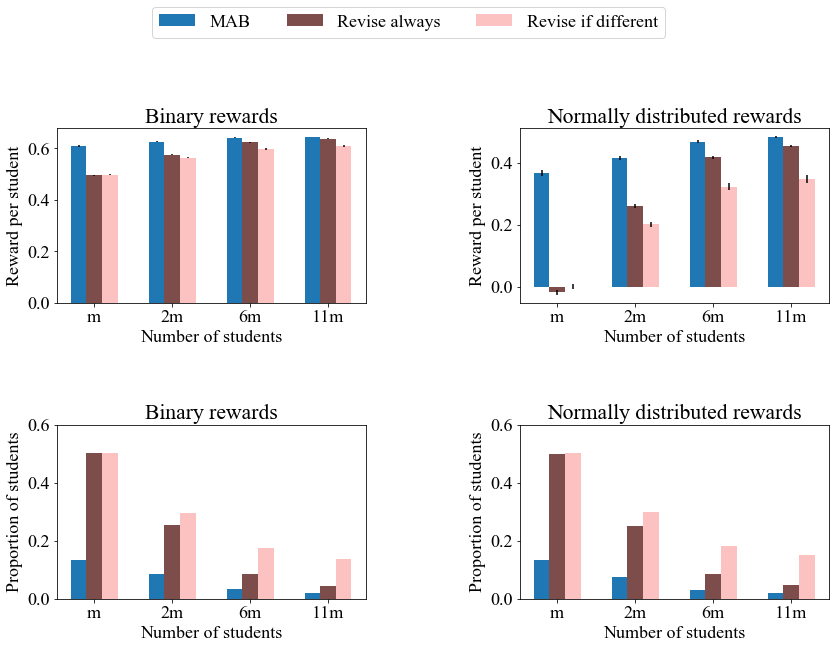

In [33]:
figure = plt.figure(figsize = (12, 8))
legend_height = 1.85
stdError = True
# Bar for Binary Reward 
combinedDfFile = '/Users/rafferty/banditalgorithms/matlabScripts/CombinedDfMatlabProcessedSwitchToBest.csv'
df = pd.read_csv(combinedDfFile)
df['mean_proportion_arm_2'] = df.mean_sample_size_2 / (df.mean_sample_size_2 + df.mean_sample_size_1)
df['sem_proportion_arm_2'] = 0

ax = figure.add_subplot(2, 2, 1)
ax = plot_avg_reward_gain(df, 'binary', ax, series_name = 'avg_reward_per_step', ylabel='Reward per student',
                          hasLegend=True, legend_anchor=(0.55, 0))
ax.set_title("Binary rewards")
ax.legend(sampling_type_names,ncol=3, bbox_to_anchor=(2, 1.75))
# plt.gcf().text(0.15,.96,'Average Rewards per Student', fontsize=24)

ax = figure.add_subplot(2, 2, 2)
ax = plot_avg_reward_gain(df, 'normal', ax, series_name = 'avg_reward_per_step', ylabel='Reward per student', 
                          hasLegend=False, legend_anchor=(0.55, 1.55))
ax.set_title("Normally distributed rewards")

ax = figure.add_subplot(2, 2, 3)
ax = plot_avg_reward_gain(df, 'binary', ax, series_name = 'proportion_arm_2', ylabel='Proportion of students',
                          hasLegend=False, legend_anchor=(0.55, 1.55))
ax.set_title("Binary rewards")
ax.set_ylim([0, .6])
# plt.gcf().text(.63,.96,'Students in Less Effective Condition', fontsize=24)


ax = figure.add_subplot(2, 2, 4)
ax = plot_avg_reward_gain(df, 'normal', ax, series_name = 'proportion_arm_2', ylabel='Proportion of students',
                          hasLegend=False, legend_anchor=(0.55, 1.55))
ax.set_title("Normally distributed rewards")
ax.set_ylim([0, .6])
starting_label_x = 0.005
label_y = .1
label_x_increment = 0.245
# for i in range(4):
#     plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
#                    '(' + chr(ord('a')+i) + ')', fontsize=18)
figure.tight_layout()
figure.subplots_adjust(wspace = .5, hspace = .7)
figure.show()
save_date_prefix = "190617"
figure.savefig(outdir+save_date_prefix+'SwitchToBestGraph.pdf', bbox_inches='tight')
print(outdir+save_date_prefix+'SwitchToBestGraph.pdf')

In [ ]:
figure = plt.figure(figsize = (16, 4))
legend_height = 1.85
stdError = True
# Bar for Binary Reward 
combinedDfFile = '/Users/rafferty/banditalgorithms/matlabScripts/CombinedDfMatlabProcessedSwitchToBest.csv'
df = pd.read_csv(combinedDfFile)
df['mean_proportion_arm_2'] = df.mean_sample_size_2 / (df.mean_sample_size_2 + df.mean_sample_size_1)
df['sem_proportion_arm_2'] = 0

ax = figure.add_subplot(1, 4, 1)
ax = plot_avg_reward_gain(df, 'binary', ax, series_name = 'avg_reward_per_step', ylabel='Reward per student',hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Binary rewards")
ax.legend(sampling_type_names,ncol=3, bbox_to_anchor=(2.4, 1.57))
plt.gcf().text(0.15,.96,'Average Rewards per Student', fontsize=24)

ax = figure.add_subplot(1, 4, 2)
ax = plot_avg_reward_gain(df, 'normal', ax, series_name = 'avg_reward_per_step', ylabel='Reward per student', hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Normally-dist. rewards")

ax = figure.add_subplot(1, 4, 3)
ax = plot_avg_reward_gain(df, 'binary', ax, series_name = 'proportion_arm_2', ylabel='Proportion of students',hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Binary rewards")
ax.set_ylim([0, .6])
plt.gcf().text(.63,.96,'Students in Less Effective Condition', fontsize=24)


ax = figure.add_subplot(1, 4, 4)
ax = plot_avg_reward_gain(df, 'normal', ax, series_name = 'proportion_arm_2', ylabel='Proportion of students', hasLegend=True, legend_anchor=(0.55, 1.55))
ax.set_title("Normally-dist. rewards")
ax.set_ylim([0, .6])
# figure.subplots_adjust(wspace = .3)
starting_label_x = 0.005
label_y = .1
label_x_increment = 0.245
for i in range(4):
    plt.gcf().text(starting_label_x+i*label_x_increment, label_y, \
                   '(' + chr(ord('a')+i) + ')', fontsize=18)
figure.tight_layout()
figure.show()
figure.savefig(outdir+date_prefix+'SwitchToBestGraph.pdf', bbox_inches='tight')
print(outdir+date_prefix+'SwitchToBestGraph.pdf')